In [28]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
import pandas as pd
sns.set_style('ticks')

Populating the interactive namespace from numpy and matplotlib


/home/camille/miniconda/envs/py3.assembly/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['ma']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [29]:
data = pd.read_csv('Ast_g.heptamerbias.csv', header=None, names=['kmer', 1, 2, 3, 4, 5, 6, 7, 8])

In [32]:
data.head()

,kmer,1,2,3,4,5,6,7,8
0,AAAAAAA,633772,112055,2946239,749791,253383,108725,32248,23436
1,AAAAAAT,354222,31994,1903689,365184,123257,53758,13768,4579
2,AAAAAAC,118413,20474,1138971,222564,75488,45414,13983,2549
3,AAAAAAG,159322,30781,1808843,382415,114882,42002,10321,2794
4,AAAAATA,99801,19939,1455795,235026,60661,21810,5664,189


/home/camille/miniconda/envs/py3.assembly/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


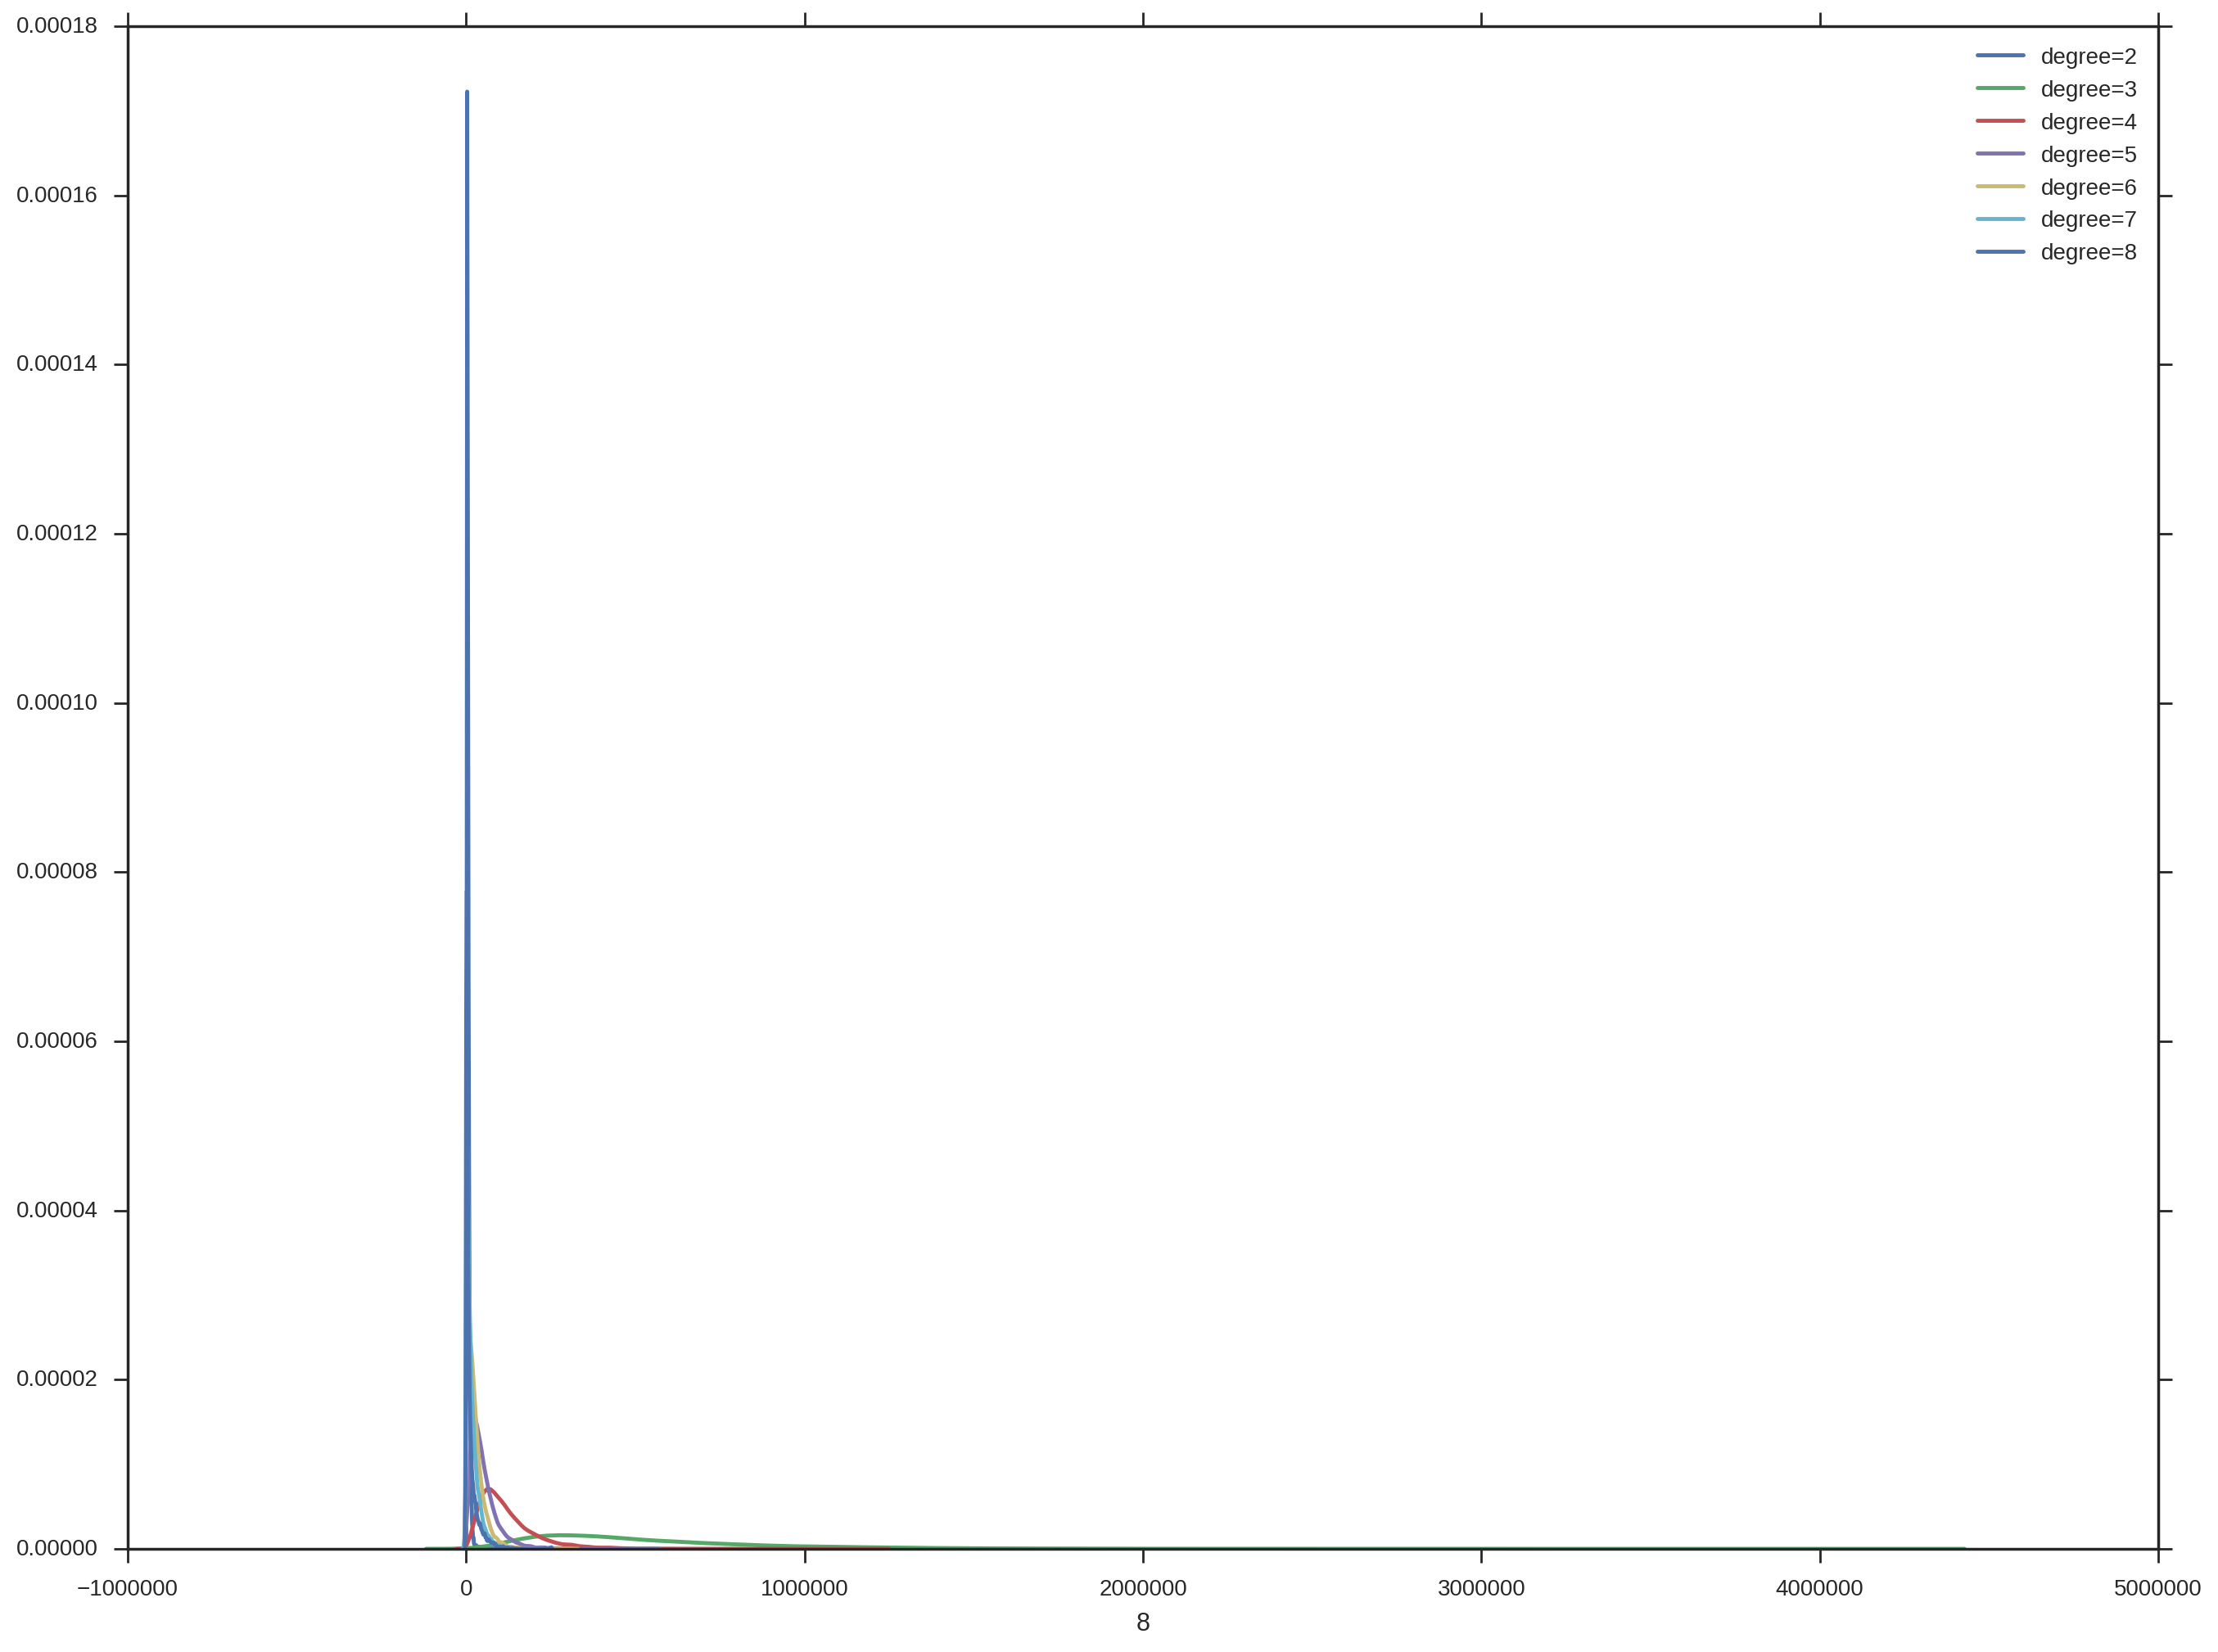

In [30]:
figsize(16,12)
for d in range(2,9):
    sns.distplot(data[d], hist=False, label='degree={0}'.format(d))
legend()

In [33]:
P_h = pd.Series(dict(zip(data.kmer, 
                         data[list(range(1,9))].sum(axis=1) / data.set_index('kmer')[list(range(1,9))].sum(axis=1).sum())))

In [34]:
P_h.head()

AAAAAAA    0.000372
AAAAAAC    0.000125
AAAAAAG    0.000195
AAAAAAT    0.000218
AAAAACA    0.000176
dtype: float64

In [35]:
P_D = data[list(range(1,9))].sum(axis=0) / data[list(range(1,9))].sum(axis=0).sum()

In [36]:
P_D

1    0.039067
2    0.006898
3    0.667756
4    0.150372
5    0.064586
6    0.035847
7    0.022010
8    0.013465
dtype: float64

In [37]:
tidy = pd.melt(data, id_vars=['kmer'], value_vars=[1,2,3,4,5,6,7,8], var_name='degree', value_name='heptamer_count')

In [38]:
tidy.head()

,kmer,degree,heptamer_count
0,AAAAAAA,1,633772
1,AAAAAAT,1,354222
2,AAAAAAC,1,118413
3,AAAAAAG,1,159322
4,AAAAATA,1,99801


In [39]:
tidy['P(h|D)'] = (tidy.set_index(['degree', 'kmer']) / tidy.groupby('degree').sum()).reset_index()['heptamer_count']

In [40]:
tidy.head()

,kmer,degree,heptamer_count,P(h|D)
0,AAAAAAA,1,633772,0.001242
1,AAAAAAT,1,354222,0.000694
2,AAAAAAC,1,118413,0.000232
3,AAAAAAG,1,159322,0.000312
4,AAAAATA,1,99801,0.000196


In [41]:
def p_D_h(row):
    return (row['P(h|D)'] * P_D[row.degree]) / P_h[row.kmer]

tidy['P(D|h)'] = tidy.apply(p_D_h, axis=1)

In [42]:
tidy.sort_values(['kmer', 'degree'])

,kmer,degree,heptamer_count,P(h|D),P(D|h)
0,AAAAAAA,1,633772,0.001242,0.130415
16384,AAAAAAA,2,112055,0.001244,0.023058
32768,AAAAAAA,3,2946239,0.000338,0.606266
49152,AAAAAAA,4,749791,0.000382,0.154289
65536,AAAAAAA,5,253383,0.000300,0.052140
81920,AAAAAAA,6,108725,0.000232,0.022373
98304,AAAAAAA,7,32248,0.000112,0.006636
114688,AAAAAAA,8,23436,0.000133,0.004823
2,AAAAAAC,1,118413,0.000232,0.072298
16386,AAAAAAC,2,20474,0.000227,0.012500


P(D|h) = P(h|D) * P(D) / P(h)

In [31]:
tidy.sort_values('heptamer_prob', ascending=False)

,kmer,degree,heptamer_count,heptamer_prob
39269,TCTTCTT,3,4287311,0.000328
42390,CTTCTTC,3,4090565,0.000313
38489,TTCTTCT,3,3976754,0.000304
33548,AAGAAGA,3,3853936,0.000295
45251,GAAGAAG,3,3719223,0.000285
35888,AGAAGAA,3,3572836,0.000274
34848,ACAACAA,3,3506415,0.000268
33288,AACAACA,3,3476987,0.000266
38749,TTGTTGT,3,3452287,0.000264
38229,TTTTTTT,3,3448386,0.000264


/home/camille/miniconda/envs/py3.assembly/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


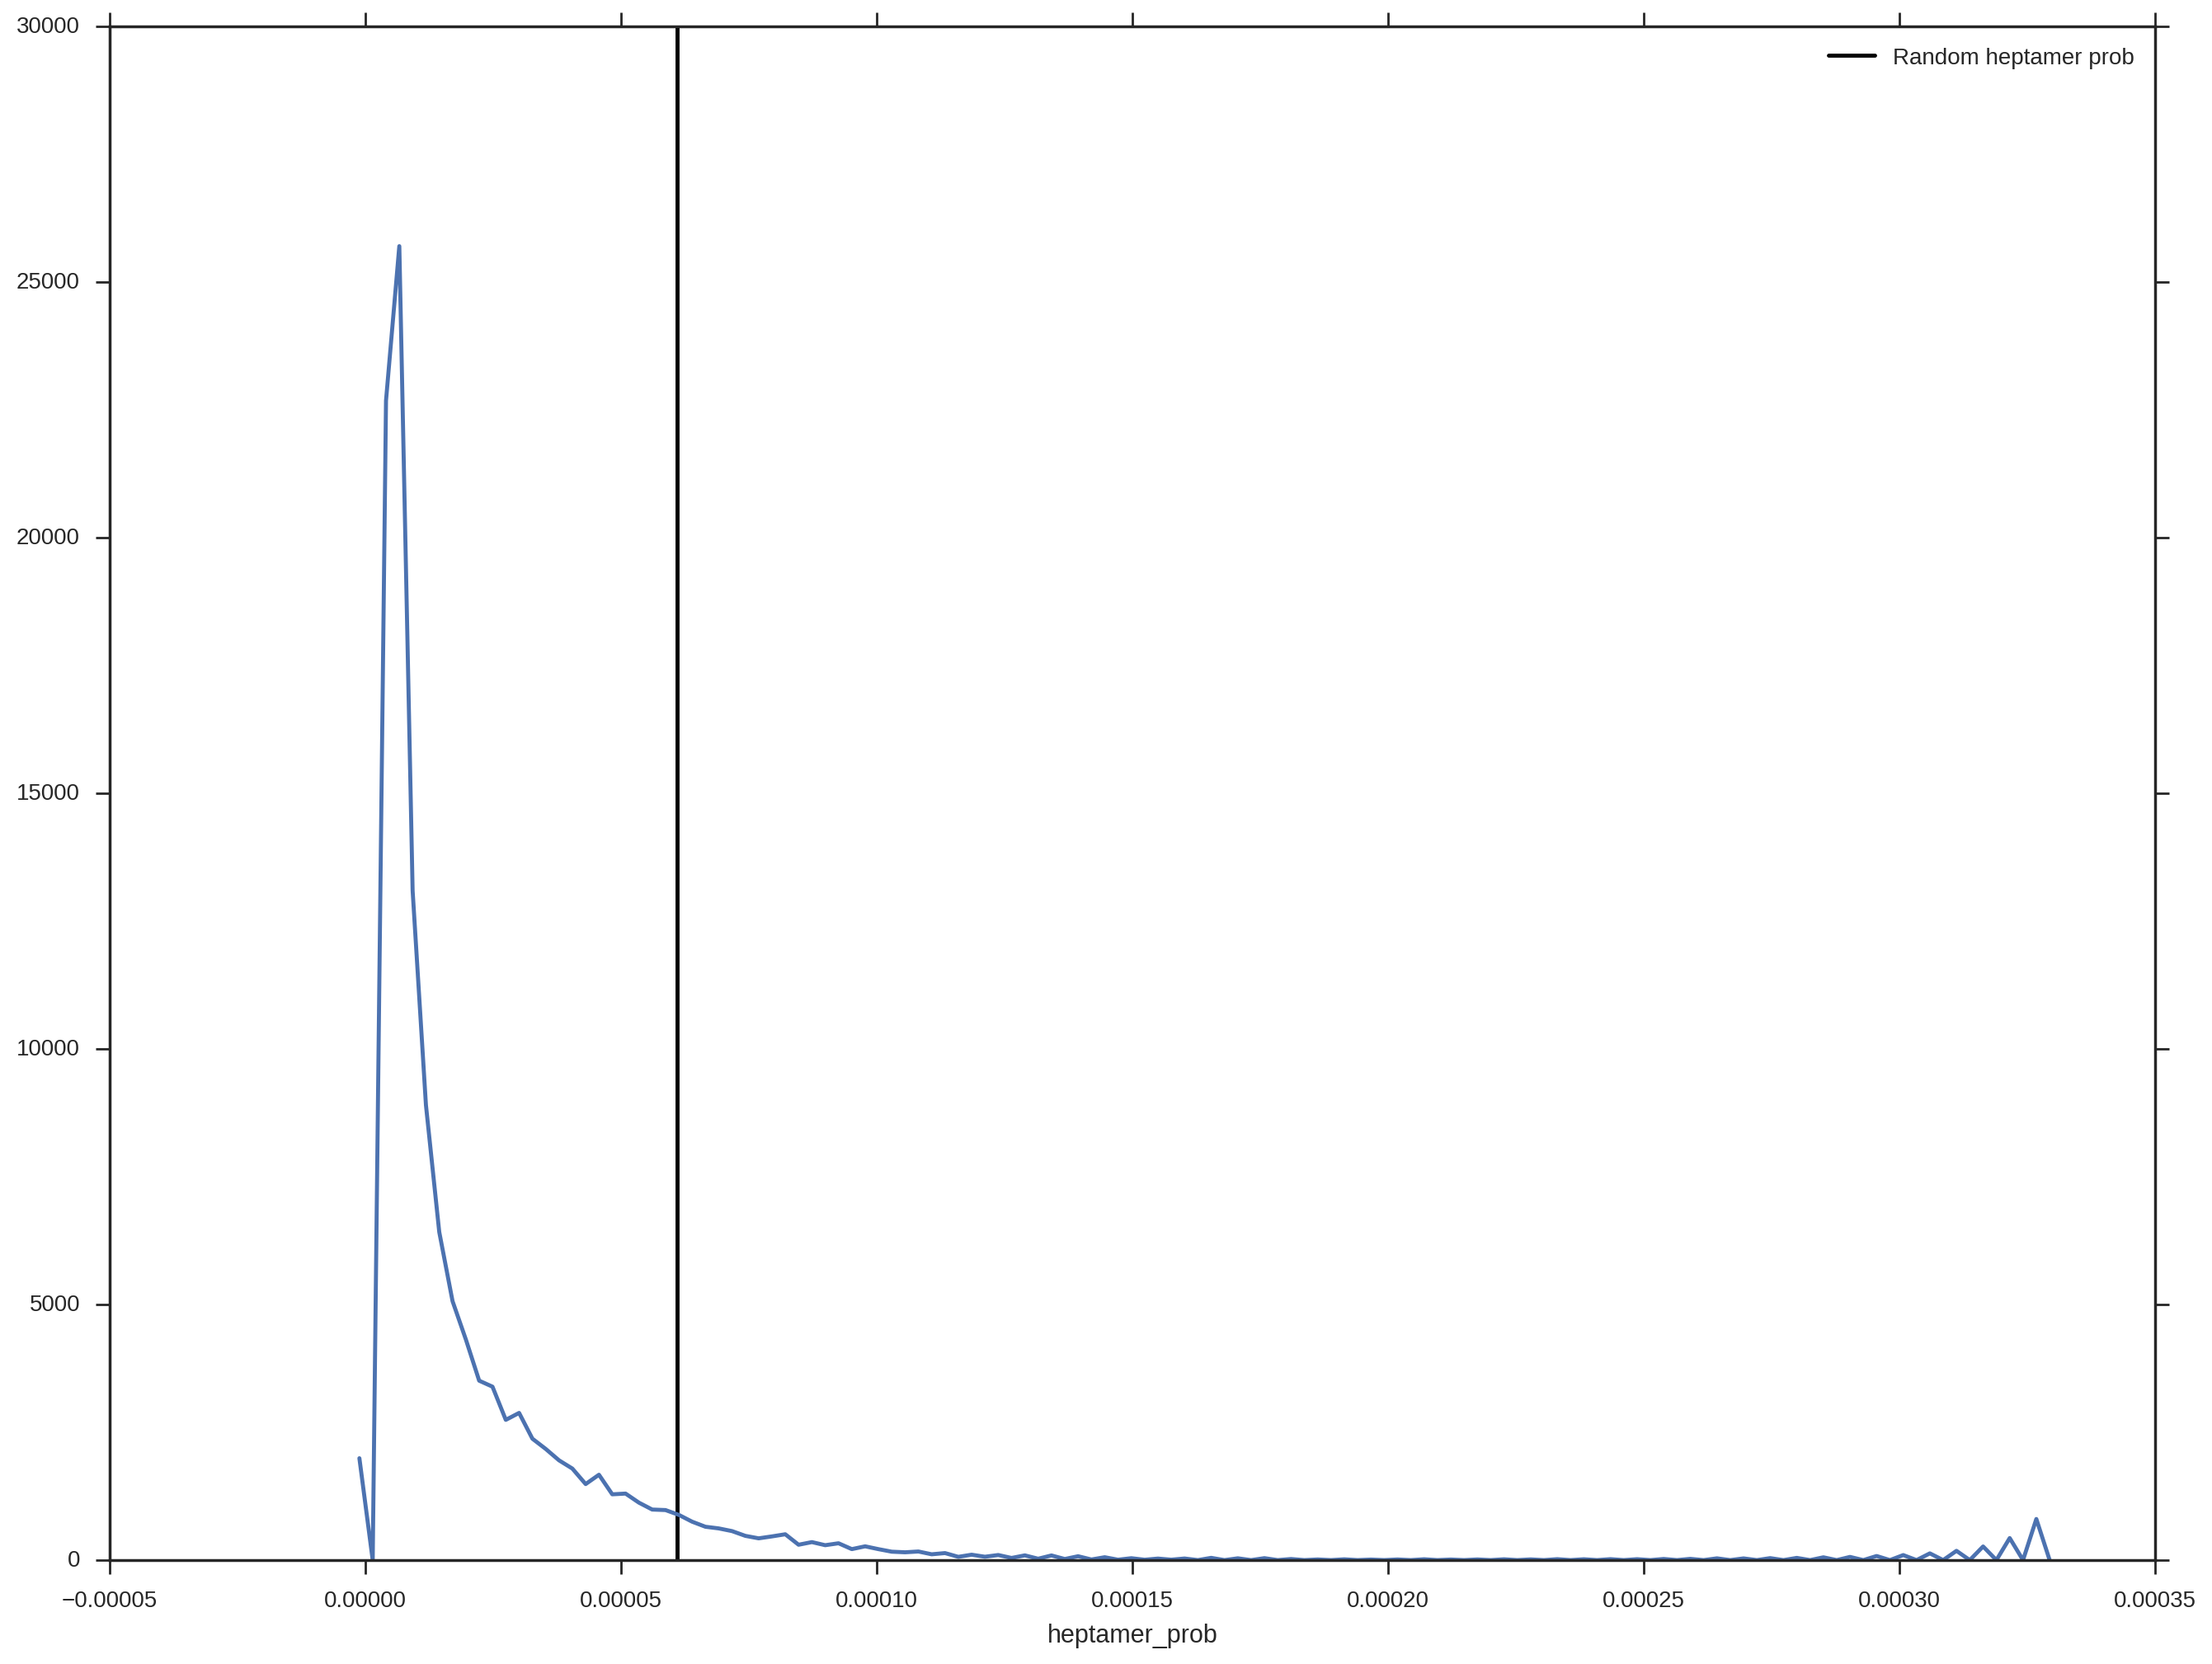

In [43]:
sns.distplot(tidy.heptamer_prob, hist=False)
vlines(.25 ** 7, 0, plt.gca().get_ylim()[1], label='Random heptamer prob')
legend()

In [2]:
paths = pd.read_csv('Ast_g.paths.csv')

In [13]:
paths.set_index('t', inplace=True)

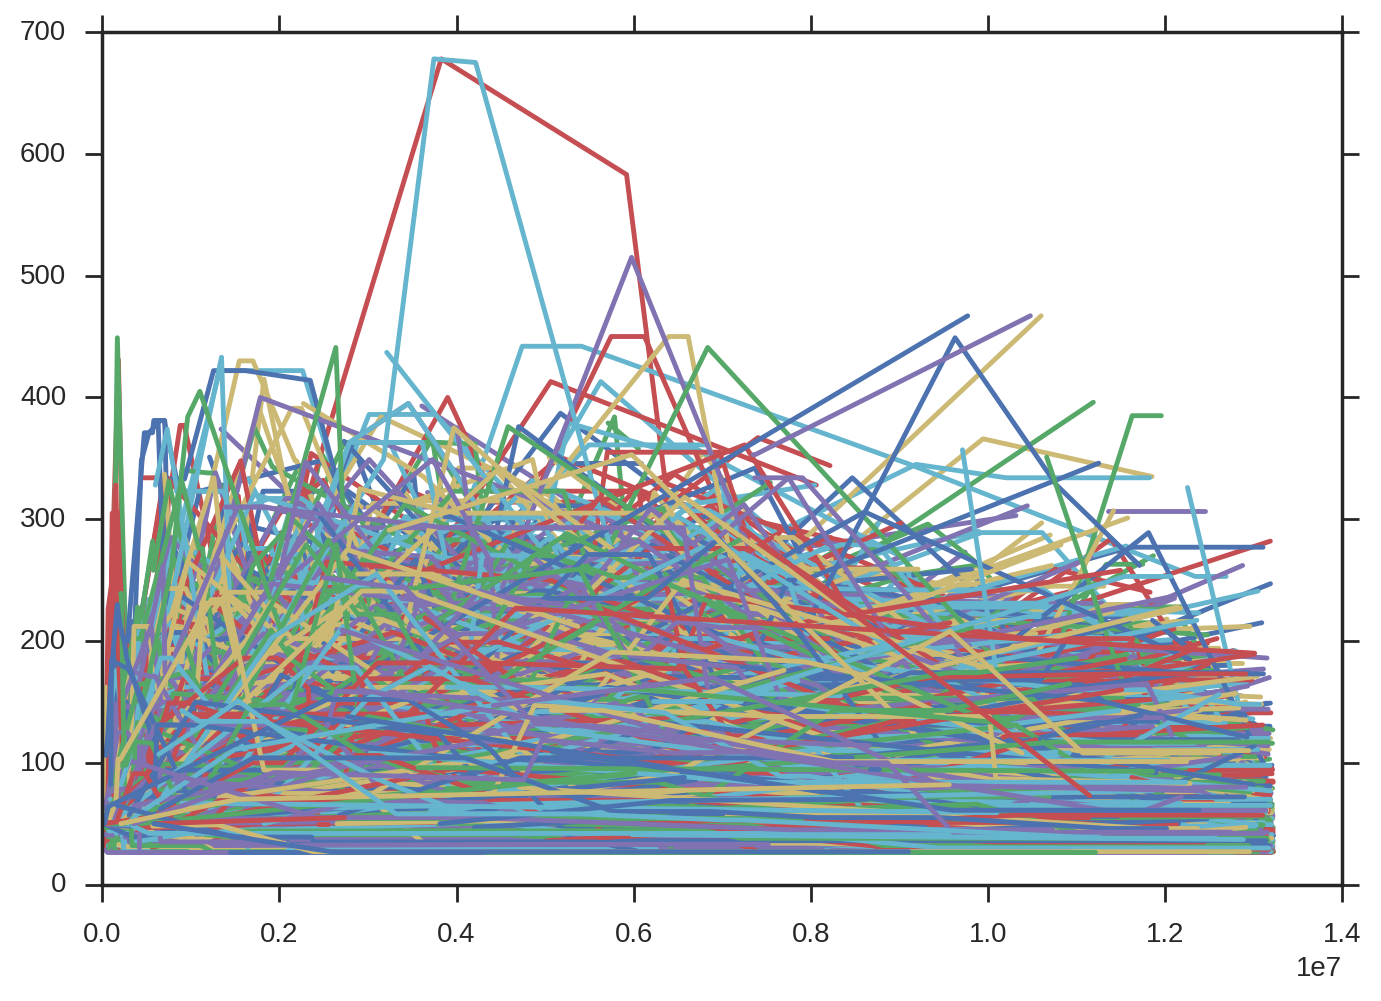

In [4]:
for name, group in paths.groupby('kmer'):
    plot(group.t, group.path_len)

In [14]:
paths.head()

,hash,kmer,path_len,kmer_count
t,,,,
422,13993627044986761216,TCGCAGTGTTGTTGGTGTTGATGTGGA,50,0
425,7691119506052603904,CCACCGATCTTCCACCCACTCACCCTA,50,0
495,17154751307217350656,GAAGATGTTGACACTGTCATAGATTTG,50,0
676,8555021847222198272,CTTTCTCCTTGGTGACTGATTACGAAA,50,0
843,18048606665953738752,GTTATGGAAGTTTACACAGAAGATGGT,50,0


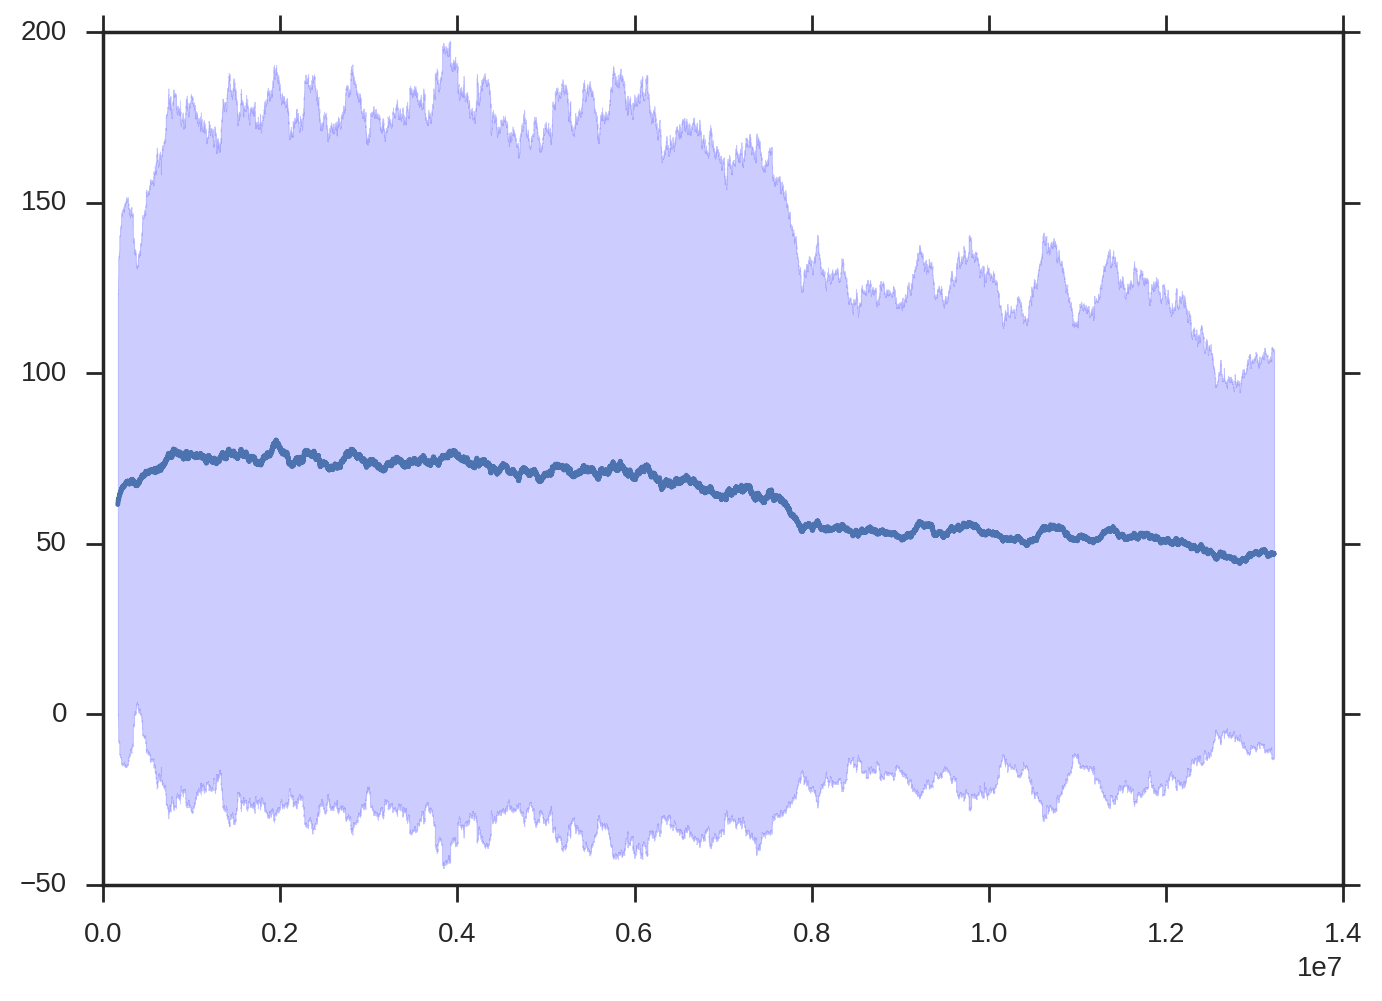

In [27]:
ma = paths.path_len.rolling(1000).mean()
mstd = paths.path_len.rolling(1000).std()
plot(ma.index, ma)
fill_between(mstd.index, ma-2*mstd, ma+2*mstd, color='b', alpha=0.2)